In [1]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_data_dir=r'/Users/rahul/Downloads/organs/train'
valid_data_dir=r'/Users/rahul/Downloads/organs/test' 

In [3]:
train_datagen=ImageDataGenerator(rescale=1/255.0,
                                    rotation_range=30,
                                    zoom_range=0.4,
                                    horizontal_flip=True)
train_generator=train_datagen.flow_from_directory(train_data_dir,
                                                    batch_size=16,
                                                     class_mode='categorical',
                                                     target_size=(224,224))

classes_name=train_generator.class_indices.keys()
classes_name=list(classes_name)
classes_name

Found 711 images belonging to 3 classes.


['brain', 'chest', 'knee']

In [4]:
validation_datagen=ImageDataGenerator(rescale=1/255.0)
validation_generator=validation_datagen.flow_from_directory(valid_data_dir,
                                                               batch_size=16,
                                                               class_mode='categorical',
                                                               target_size=(224,224))

Found 87 images belonging to 3 classes.


In [7]:
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import models,layers
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 173056)           

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10
45/45 [==============================] - 11s 241ms/step - loss: 1.2353 - accuracy: 0.6456 - val_loss: 0.4919 - val_accuracy: 0.7471
Epoch 2/10
45/45 [==============================] - 11s 231ms/step - loss: 0.4578 - accuracy: 0.8565 - val_loss: 0.1494 - val_accuracy: 0.9885
Epoch 3/10
45/45 [==============================] - 11s 232ms/step - loss: 0.1181 - accuracy: 0.9761 - val_loss: 0.0184 - val_accuracy: 1.0000
Epoch 4/10
45/45 [==============================] - 11s 238ms/step - loss: 0.0564 - accuracy: 0.9873 - val_loss: 0.0415 - val_accuracy: 0.9770
Epoch 5/10
45/45 [==============================] - 11s 245ms/step - loss: 0.0568 - accuracy: 0.9817 - val_loss: 0.0415 - val_accuracy: 0.9885
Epoch 6/10
45/45 [==============================] - 12s 253ms/step - loss: 0.0337 - accuracy: 0.9930 - val_loss: 0.0360 - val_accuracy: 0.9885
Epoch 7/10
45/45 [==============================] - 12s 259ms/step - loss: 0.0401 - accuracy: 0.9859 - val_loss: 0.0689 - val_accuracy: 0.9885

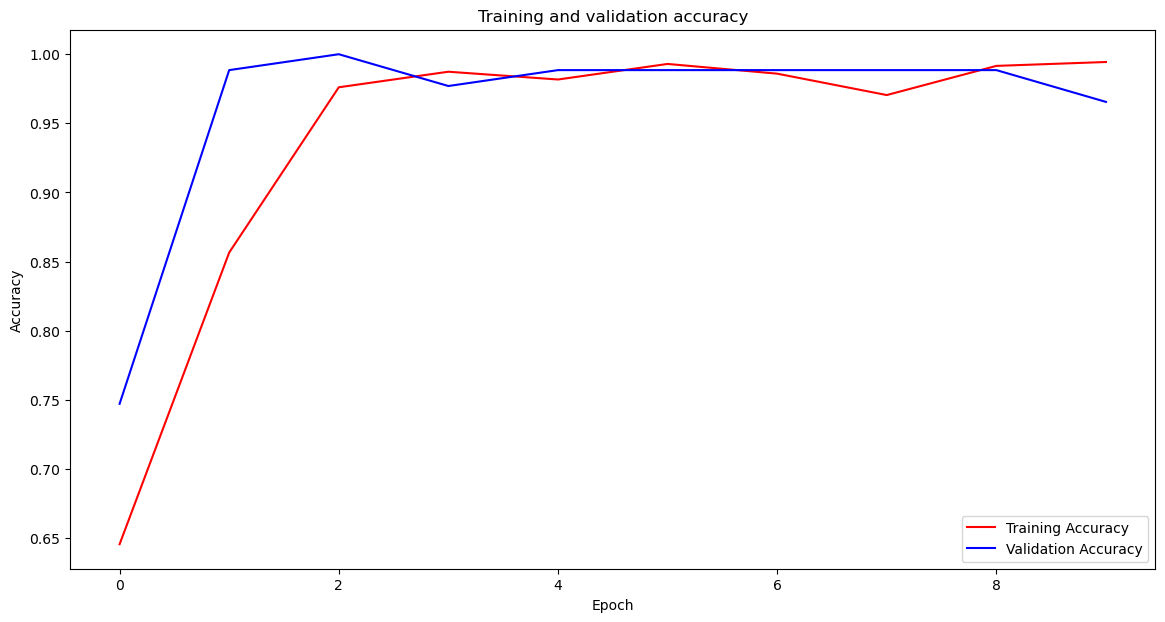

In [9]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))
fig=plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

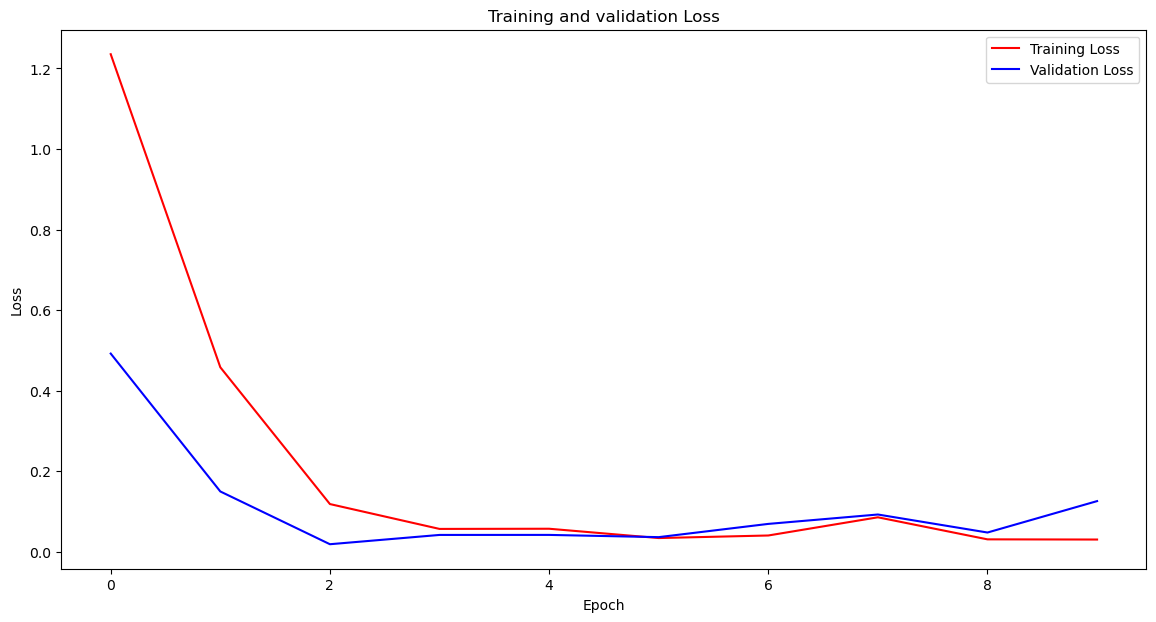

In [10]:
fig2=plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation Loss')
plt.legend(loc='upper right')
plt.show()

In [2]:
#predicting a single input image
import cv2
img=cv2.imread('/Users/rahul/Downloads/organs/test/brain/No16.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(224,224))
print(img.shape)
plt.imshow(img,cmap=plt.cm.binary)

prediction=model.predict(np.array([img])/255)
index=np.argmax(prediction)
print(classes_name[index])

(224, 224, 3)


NameError: name 'plt' is not defined

In [ ]:
classes_name=list(classes_name)
(classes_name[1])

In [15]:
import joblib
joblib.dump(model,'/Users/rahul/Downloads/brain_tumor_dataset/organ_clissification')

['/Users/rahul/Downloads/brain_tumor_dataset/organ_clissification']